In [135]:
from matplotlib import pyplot as plt
import numpy as np
import random as rd
import math 


In [117]:
def simulate(N, initAmount, iterations):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    for _ in range(iterations):
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        min_amount = min(actors[i], actors[j])
        delta = rd.randint(0, min_amount)
        actors[i] += delta
        actors[j] -= delta
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    plt.hist(actors, bins=30)

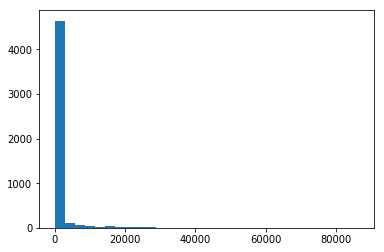

In [95]:
simulate(5000, 1000, 300000)

In [253]:
def simul(N, initAmount, iterations):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    for _ in range(iterations):
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        max_amount = max(actors[i], actors[j])
        delta = rd.randint(0, max_amount)
        if delta < actors[i]:
            actors[i] -= delta
            actors[j] += delta
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    plt.hist(actors, bins=30)

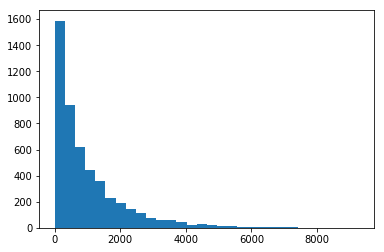

In [254]:
simul(5000, 1000, 100000)

In [318]:
def simulateconstant(N, initAmount, iterations, delta):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    
    for _ in range(iterations):
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        if delta < actors[i]:
            actors[i] -= delta
            actors[j] += delta
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    plt.hist(actors, bins=100)
    plt.title("Stationary Distribution, Constant delta: N=500,  M=50000, time=10^6, delta=4")
    plt.ylabel("Probability")
    plt.xlabel("Money")

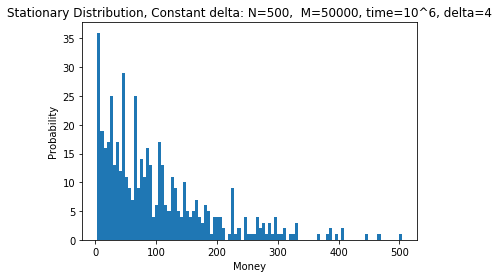

In [319]:
simulateconstant(500, 100, 1000000, 4)

In [316]:
def simulate2(N, initAmount, iterations):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    
    for _ in range(iterations):
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        nu = rd.random()
        delta = int(nu*(actors[i]+actors[j])/2.)
        if delta < actors[i]:
            actors[i] -= delta
            actors[j] += delta
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    plt.hist(actors, bins=100)
    plt.title("Stationary Distribution, Random Average Delta: N=500,  M=1000, time=4.10^5")
    plt.ylabel("Probability")
    plt.xlabel("Money")

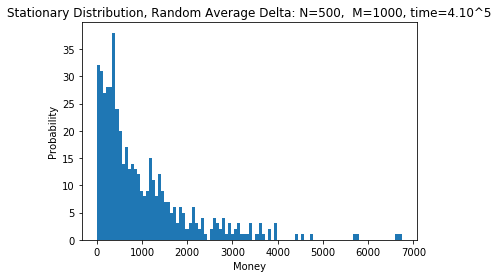

In [317]:
simulate2(500, 1000, 400000)

In [314]:
def simulate3(N, initAmount, iterations):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    
    for _ in range(iterations):
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        nu = rd.random()
        delta = int(nu*initAmount)
        if delta < actors[i]:
            actors[i] -= delta
            actors[j] += delta
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    plt.hist(actors, bins=100)
    plt.title("Stationary Distribution, Random fraction of Initial Amount: N=500,  M=1000, time=4.10^5")
    plt.ylabel("Probability")
    plt.xlabel("Money")

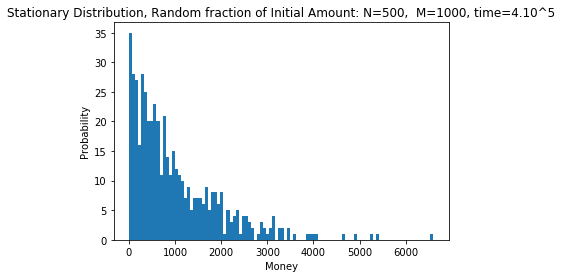

In [315]:
simulate3(500, 1000, 400000)

In [128]:
rd.random()

0.8722822547070256

In [244]:
def dette1(N, initAmount, iterations, delta):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    for _ in range(iterations):
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        actors[i] -= delta
        actors[j] += delta
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    plt.hist(actors, bins=100)

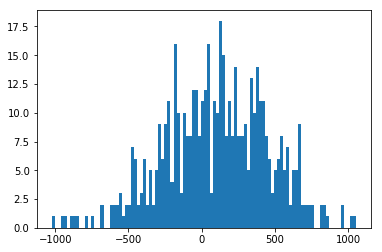

In [245]:
dette1(500, 100, 2000000, 4)

In [320]:
def dette(N, initAmount, iterations, max_dette):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    
    for _ in range(iterations):
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        nu = rd.random()
        delta = int(nu*initAmount)
        if delta - max_dette < actors[i]:
            actors[i] -= delta
            actors[j] += delta
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    plt.hist(actors, bins=100)
    plt.title("Stationary Distribution with debt max:800, N=500,  M=1000, time=4.10^5")
    plt.ylabel("Probability")
    plt.xlabel("Money")

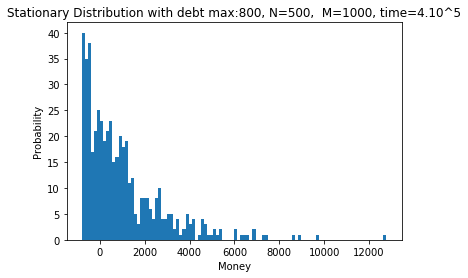

In [321]:
dette(500, 1000, 400000, 800)

In [322]:
def entropy1(N, initAmount, iterations):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    counts = {initAmount:N}
    entropyList = [0]
    fig = 0
    evolution = []
    
    i, j = rd.randint(0, N-1), rd.randint(0, N-1)
    nu = rd.random()
    delta = int(nu*initAmount)

    if delta <= actors[i]:
        
        actors[i] -= delta
        actors[j] += delta
        if not actors[i] in counts:
            counts[actors[i]] = 0
        if not actors[j] in counts:
            counts[actors[j]] = 0
            
        counts[actors[i]] += 1
        counts[actors[j]] += 1
        
        counts[actors[i]+delta] -= 1
        counts[actors[j]-delta] -= 1
        
    entropy = (1./N)*sum([-1*counts[amount]*math.log(counts[amount]/float(N)) for amount in counts])
    entropyList.append(entropy)
    
    for n in range(1, iterations+1):
        
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        previousi, previousj = actors[i], actors[j]
        nu = rd.random()
        delta = int(nu*initAmount)
        
        if delta < actors[i]:
            actors[i] -= delta
            actors[j] += delta
            
            amounti, amountj = actors[i], actors[j]
            
            if not amounti in counts:
                counts[amounti] = 0
            if not amountj in counts:
                counts[amountj] = 0
                
            #lui enlève la partie de l'entropy correspondante aux comptes des anciens montants
            if counts[previousi] > 0:
                entropy -= (-1./N)*counts[previousi]*math.log(counts[previousi]/float(N))
            if counts[previousj] > 0:
                entropy -= (-1./N)*counts[previousj]*math.log(counts[previousj]/float(N))
            
            #on lui enlève aussi la partie de l'entropy qui concernait les comptes des nouveaux montants
            if counts[amounti] > 0:
                entropy -= (-1./N)*counts[amounti]*math.log(counts[amounti]/float(N))
            if counts[amountj] > 0:
                entropy -= (-1./N)*counts[amountj]*math.log(counts[amountj]/float(N))
            
            counts[amounti] += 1
            counts[amountj] += 1
            
            counts[previousi] -= 1
            counts[previousj] -= 1
            
            #ajoute la nouvelle partie de l'entropy correspondante aux comptes des anciens montants
            if counts[previousi] > 0:
                entropy += (-1./N)*counts[previousi]*math.log(counts[previousi]/float(N))
            if counts[previousj] > 0:
                entropy += (-1./N)*counts[previousj]*math.log(counts[previousj]/float(N))
            
            #ajoute la nouvelle partie de l'entropy qui concerne les comptes des nouveaux montants
            if counts[amounti] > 0:
                entropy += (-1./N)*counts[amounti]*math.log(counts[amounti]/float(N))
            if counts[amountj] > 0:
                entropy += (-1./N)*counts[amountj]*math.log(counts[amountj]/float(N))
            
            entropyList.append(entropy)
            
        if (n % int(iterations/3)) == 0:
            plt.figure(fig)
            fig += 1
            plt.hist(actors, bins=100)
            plt.title("Stationary Distribution, Random fraction of Initial Amount: N=500,  M=1000, time=4.10^5")
            plt.ylabel("Probability")
            plt.xlabel("Money")
        
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    
    plt.figure(fig)
    plt.plot(list(range(len(entropyList))), entropyList)
    plt.xlim(xmin=0, xmax = 2000)    
    plt.title("Entropy Distribution, Random fraction of Initial Amount for Delta. N=500,  M=1000, time=4.10^5")
    plt.ylabel("Probability")
    plt.xlabel("Time")

C:\Users\Baptiste\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\Baptiste\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


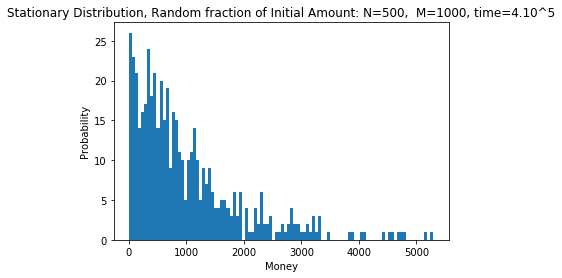

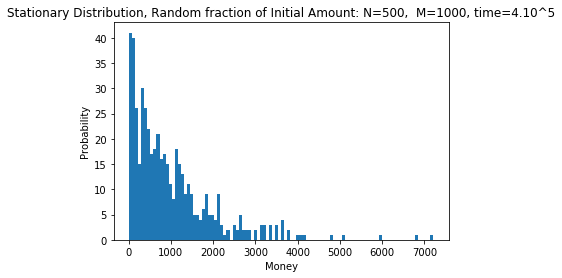

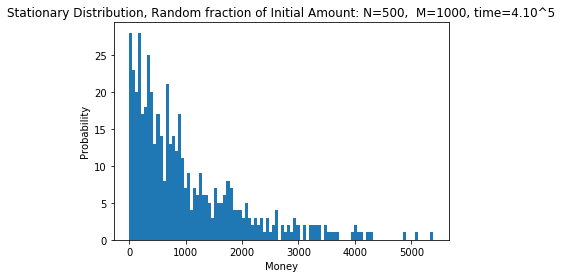

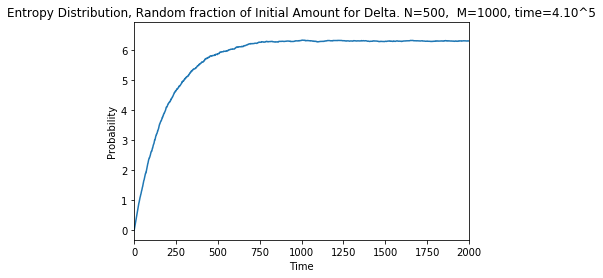

In [323]:
entropy1(500, 1000, 400000)

In [324]:
def entropy2(N, initAmount, iterations, delta):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    counts = {initAmount:N}
    entropyList = [0]
    fig = 1
    
    i, j = rd.randint(0, N-1), rd.randint(0, N-1)

    if delta <= actors[i]:
        
        actors[i] -= delta
        actors[j] += delta
        if not actors[i] in counts:
            counts[actors[i]] = 0
        if not actors[j] in counts:
            counts[actors[j]] = 0
            
        counts[actors[i]] += 1
        counts[actors[j]] += 1
        
        counts[actors[i]+delta] -= 1
        counts[actors[j]-delta] -= 1
        
    entropy = (1./N)*sum([-1*counts[amount]*math.log(counts[amount]/float(N)) for amount in counts])
    entropyList.append(entropy)
    
    for n in range(1, iterations+1):
        
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        previousi, previousj = actors[i], actors[j]
        
        if delta < actors[i]:
            actors[i] -= delta
            actors[j] += delta
            
            amounti, amountj = actors[i], actors[j]
            
            if not amounti in counts:
                counts[amounti] = 0
            if not amountj in counts:
                counts[amountj] = 0
                
            #lui enlève la partie de l'entropy correspondante aux comptes des anciens montants
            if counts[previousi] > 0:
                entropy -= (-1./N)*counts[previousi]*math.log(counts[previousi]/float(N))
            if counts[previousj] > 0:
                entropy -= (-1./N)*counts[previousj]*math.log(counts[previousj]/float(N))
            
            #on lui enlève aussi la partie de l'entropy qui concernait les comptes des nouveaux montants
            if counts[amounti] > 0:
                entropy -= (-1./N)*counts[amounti]*math.log(counts[amounti]/float(N))
            if counts[amountj] > 0:
                entropy -= (-1./N)*counts[amountj]*math.log(counts[amountj]/float(N))
            
            counts[amounti] += 1
            counts[amountj] += 1
            
            counts[previousi] -= 1
            counts[previousj] -= 1
            
            #ajoute la nouvelle partie de l'entropy correspondante aux comptes des anciens montants
            if counts[previousi] > 0:
                entropy += (-1./N)*counts[previousi]*math.log(counts[previousi]/float(N))
            if counts[previousj] > 0:
                entropy += (-1./N)*counts[previousj]*math.log(counts[previousj]/float(N))
            
            #ajoute la nouvelle partie de l'entropy qui concerne les comptes des nouveaux montants
            if counts[amounti] > 0:
                entropy += (-1./N)*counts[amounti]*math.log(counts[amounti]/float(N))
            if counts[amountj] > 0:
                entropy += (-1./N)*counts[amountj]*math.log(counts[amountj]/float(N))
            
            entropyList.append(entropy)
            
        if (n % int(iterations/10)) == 0:
            plt.figure(fig)
            fig += 1
            plt.hist(actors, bins=100)
            plt.title("Stationary Distribution, fixed Delta=1, N=500,  M=1000, time=4.10^5")
            plt.ylabel("Probability")
            plt.xlabel("Money")
    
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    
    plt.figure(fig)
    plt.plot(list(range(len(entropyList))), entropyList)
    plt.xlim(xmin=0, xmax = 2000)
    plt.title("Entropy Distribution, fixed Delta. N=500,  M=1000, time=4.10^5, delta=1")
    plt.ylabel("Probability")
    plt.xlabel("Time")

C:\Users\Baptiste\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\Baptiste\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


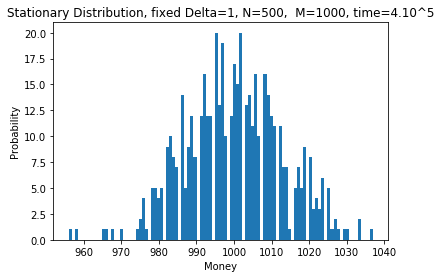

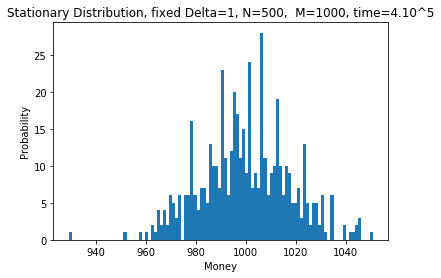

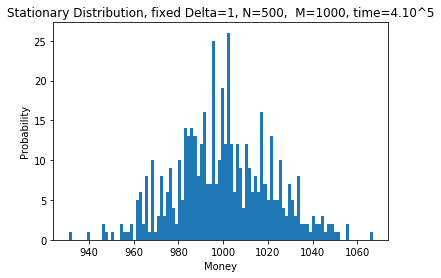

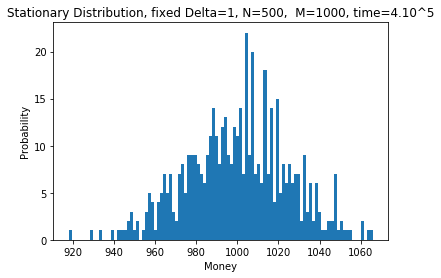

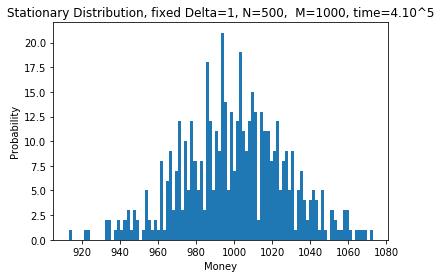

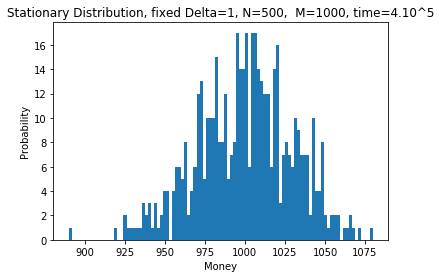

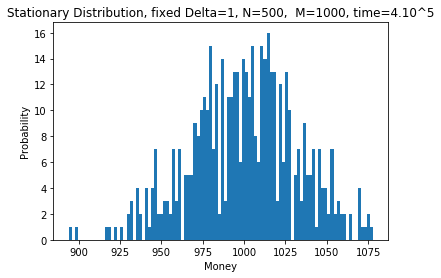

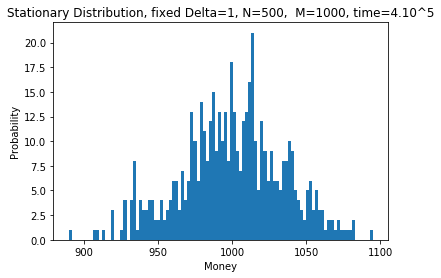

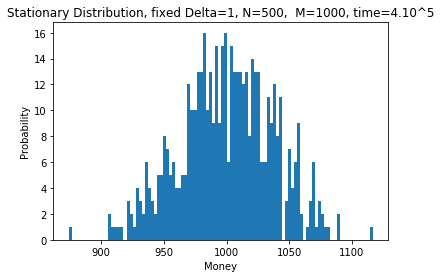

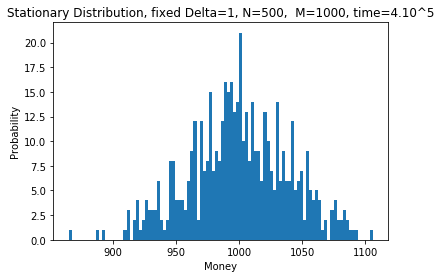

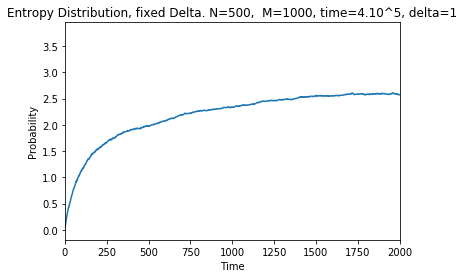

In [325]:
entropy2(500, 1000, 400000, 1)

In [326]:
def entropy3(N, initAmount, iterations):
    
    actors = np.zeros(N, dtype=int)
    actors[:] = initAmount
    counts = {initAmount:N}
    entropyList = [0]
    fig = 0
    evolution = []
    
    i, j = rd.randint(0, N-1), rd.randint(0, N-1)
    nu = rd.random()
    delta = int(nu/2.*(actors[i]+actors[j]))

    if delta <= actors[i]:
        
        actors[i] -= delta
        actors[j] += delta
        if not actors[i] in counts:
            counts[actors[i]] = 0
        if not actors[j] in counts:
            counts[actors[j]] = 0
            
        counts[actors[i]] += 1
        counts[actors[j]] += 1
        
        counts[actors[i]+delta] -= 1
        counts[actors[j]-delta] -= 1
        
    entropy = (1./N)*sum([-1*counts[amount]*math.log(counts[amount]/float(N)) for amount in counts])
    entropyList.append(entropy)
    
    for n in range(1, iterations+1):
        
        i, j = rd.randint(0, N-1), rd.randint(0, N-1)
        previousi, previousj = actors[i], actors[j]
        nu = rd.random()
        delta = int(nu/2.*(actors[i]+actors[j]))
                    
        if delta < actors[i]:
            actors[i] -= delta
            actors[j] += delta
            
            amounti, amountj = actors[i], actors[j]
            
            if not amounti in counts:
                counts[amounti] = 0
            if not amountj in counts:
                counts[amountj] = 0
                
            #lui enlève la partie de l'entropy correspondante aux comptes des anciens montants
            if counts[previousi] > 0:
                entropy -= (-1./N)*counts[previousi]*math.log(counts[previousi]/float(N))
            if counts[previousj] > 0:
                entropy -= (-1./N)*counts[previousj]*math.log(counts[previousj]/float(N))
            
            #on lui enlève aussi la partie de l'entropy qui concernait les comptes des nouveaux montants
            if counts[amounti] > 0:
                entropy -= (-1./N)*counts[amounti]*math.log(counts[amounti]/float(N))
            if counts[amountj] > 0:
                entropy -= (-1./N)*counts[amountj]*math.log(counts[amountj]/float(N))
            
            counts[amounti] += 1
            counts[amountj] += 1
            
            counts[previousi] -= 1
            counts[previousj] -= 1
            
            #ajoute la nouvelle partie de l'entropy correspondante aux comptes des anciens montants
            if counts[previousi] > 0:
                entropy += (-1./N)*counts[previousi]*math.log(counts[previousi]/float(N))
            if counts[previousj] > 0:
                entropy += (-1./N)*counts[previousj]*math.log(counts[previousj]/float(N))
            
            #ajoute la nouvelle partie de l'entropy qui concerne les comptes des nouveaux montants
            if counts[amounti] > 0:
                entropy += (-1./N)*counts[amounti]*math.log(counts[amounti]/float(N))
            if counts[amountj] > 0:
                entropy += (-1./N)*counts[amountj]*math.log(counts[amountj]/float(N))
            
            entropyList.append(entropy)
            
        if (n % int(iterations/3)) == 0:
            plt.figure(fig)
            fig += 1
            plt.hist(actors, bins=100)
            plt.title("Stationary Distribution, Random fraction of Average: N=500,  M=1000, time=4.10^5")
            plt.ylabel("Probability")
            plt.xlabel("Money")
        
    #Y = np.zeros(np.max(actors)+1)
    #for money in actors:
     #   Y[money] += 1
    
    #plt.plot(list(range(len(Y))), Y)
    
    plt.figure(fig)
    plt.plot(list(range(len(entropyList))), entropyList)
    plt.xlim(xmin=0, xmax = 2000) 
    plt.title("Entropy Distribution, Random fraction of Average for Delta. N=500,  M=1000, time=4.10^5")
    plt.ylabel("Probability")
    plt.xlabel("Time")  

C:\Users\Baptiste\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\Baptiste\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


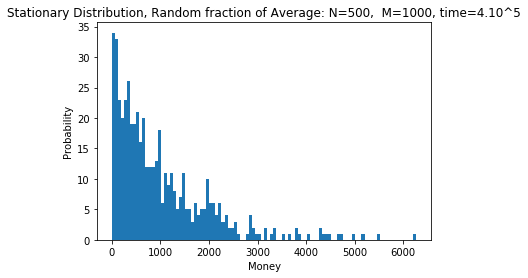

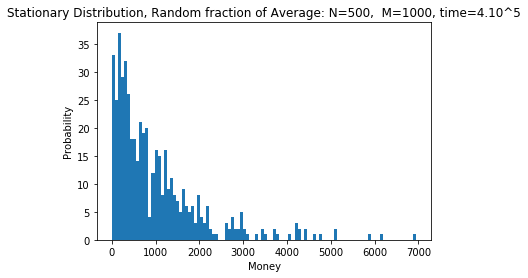

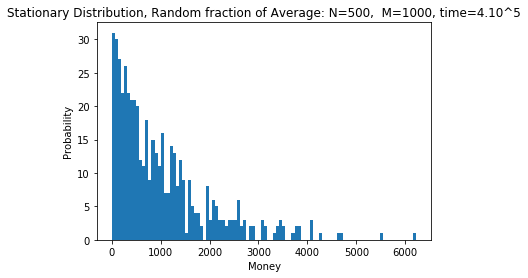

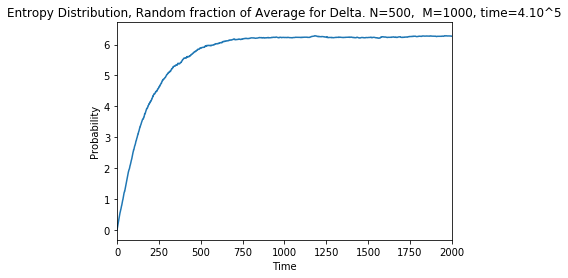

In [327]:
entropy3(500, 1000, 400000)

In [250]:
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [251]:
Y = np.arange(0,1.1,0.1)
X = np.array([0, 10030, 15630, 19280, 23210, 27680, 32470, 38080, 45070, 55300, 96240])

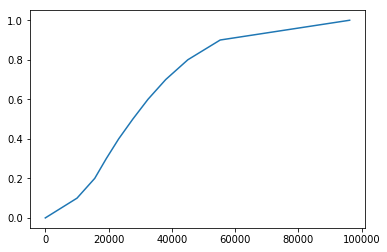

In [252]:
plt.plot(X, Y)

[11200, 11500, 11700, 11900, 12200, 12400, 12600, 12800, 13100, 13300, 13500, 13700, 13900, 14200, 14400, 14600, 14900, 15100, 15300, 15500, 15800, 16000, 16200, 16400, 16700, 16900, 17100, 17400, 17600, 17800, 18100, 18300, 18600, 18800, 19100, 19300, 19600, 19900, 20200, 20500, 20800, 21100, 21400, 21700, 22000, 22300, 22600, 22900, 23300, 23600, 23900, 24300, 24700, 25000, 25400, 25900, 26300, 26700, 27100, 27500, 27900, 28400, 28800, 29300, 29800, 30300, 30900, 31500, 32000, 32600, 33200, 33900, 34500, 35200, 36000, 36700, 37500, 38300, 39200, 40000, 41000, 42000, 42900, 43700, 44900, 46200, 47800, 49600, 51400, 53600, 56300, 59500, 63500, 68600, 75300, 83700, 96400, 116000, 166000]


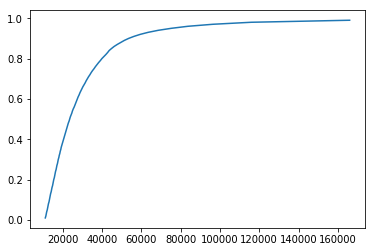

In [291]:
import csv

# Model validation with UK income database

nb = []
with open('UK_income.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        nb.append(row)
        
inco = nb[0][0].split(';')
inco[0] = '11200'



inco = list(map(lambda x: int(x.replace(' ','')), inco))

X = np.arange(0.01, 1, 0.01)
print(inco)
plt.plot(inco, X)
plt.show()

[0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58
 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45 0.44
 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31 0.3
 0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17 0.16
 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05 0.04 0.03 0.02
 0.01]
[-0.01005034 -0.02020271 -0.03045921 -0.04082199 -0.05129329 -0.0618754
 -0.07257069 -0.08338161 -0.09431068 -0.10536052 -0.11653382 -0.12783337
 -0.13926207 -0.15082289 -0.16251893 -0.17435339 -0.18632958 -0.19845094
 -0.21072103 -0.22314355 -0.23572233 -0.24846136 -0.26136476 -0.27443685
 -0.28768207 -0.30110509 -0.31471074 -0.32850407 -0.34249031 -0.35667494
 -0.37106368 -0.38566248 -0.40047757 -0.41551544 -0.43078292 -0.4462871
 -0.46203546 -0.4780358  -0.49429632 -0.51082562 -0.52763274 

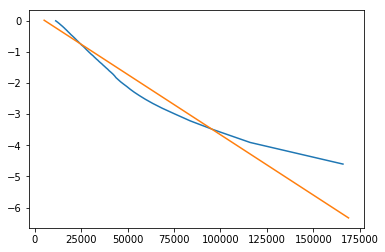

In [301]:
les = 1-np.array(X)
print(les)
lesX = np.log(les)
print(lesX)

plt.plot(inco, lesX)

plt.plot(np.arange(5000, 170000, 1000), fit[0]*np.arange(5000, 170000, 1000)+fit[1])

In [284]:
fit = np.polyfit(inco, lesX, 1)

In [304]:
from scipy import stats
lr = scipy.stats.linregress(inco, lesX)
lr

LinregressResult(slope=-3.866691805569778e-05, intercept=0.20237491316179135, rvalue=-0.960003468217025, pvalue=1.9830317059177354e-55, stderr=1.1450395189183813e-06)

In [285]:
fit

array([-3.86669181e-05,  2.02374913e-01])

In [306]:
-fit[1]/fit[0]

5233.799933842166

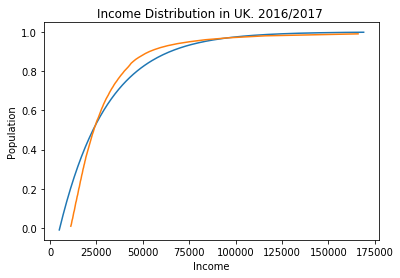

In [329]:
lesY = 1- np.exp(fit[0]*np.arange(5000, 170000, 1000)+fit[1])

plt.plot(np.arange(5000, 170000, 1000), lesY)
plt.plot(inco, X)

plt.title("Income Distribution in UK. 2016/2017 ")
plt.ylabel("Population")
plt.xlabel("Income") 

plt.show()